In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
data_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

In [3]:
data_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_df.shape

(58645, 13)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
#Drop id column
data_df.drop('id', axis=1, inplace=True)

In [8]:
for i in data_df.columns:
    print(i, data_df[i].nunique())

person_age 53
person_income 2641
person_home_ownership 4
person_emp_length 36
loan_intent 6
loan_grade 7
loan_amnt 545
loan_int_rate 362
loan_percent_income 61
cb_person_default_on_file 2
cb_person_cred_hist_length 29
loan_status 2


In [9]:
for i in data_df.columns:
    print(data_df[i].value_counts())
    print('*'*40)

person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64
****************************************
person_income
60000     4164
50000     2992
30000     2200
40000     1981
70000     1876
          ... 
48602        1
46151        1
128474       1
43900        1
124600       1
Name: count, Length: 2641, dtype: int64
****************************************
person_home_ownership
RENT

###Data includes the following features. The data as 58645 rows and 13 features. There are no columns missing data


*   **id** - Unique identifier for each loan applicant
*   **person_age** - Age of applicant. Data type = Int
*   **person_income** - Income of applicant. Data type = Int
*   **person_home_ownership** - Types of home ownership e.g. own, rent, mortgage. Data is categorical. Data is object
*   **person_emp_length** - Length of employment. Data type = float
*   **loan_intent** - The goal for which a loan is acquired e.g. education. This is a categorical column with an object data type
*   **loan_grade** - A classification of the loan, this is a categorical column of type object
*   **loan_amnt** - The value of the loan amount. This is a continuous value with type int
*   **loan_int_rate** - This is the loan interest rate. It is a continuous value of type float
*   **loan_percent_income** - Not sure, but this could be the loan percent of income. This continuous feature with type float
*   **cb_person_default_on_file** - Flag for whether there is a default on file. This is a categorical value of type object
*   **cb_person_cred_hist_length** - Credit history length, I presume in years. This a continuous feature of type int
*   **loan_status** - This is the target predition. I imagine 1 is loan assigned and 0 is load not assigned. It is of type int

In [10]:
numerical_cols = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_status']

categorical_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

In [11]:
def plotHistNBoxPlot(col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(15,10))
    sns.set(style='darkgrid')
    
    sns.boxplot(x=data_df[col], ax=ax_box, showmeans=True)
    sns.distplot(data_df[col],ax=ax_hist)
    ax_hist.axvline(data_df[col].mean(), color='green',linestyle='dashed',linewidth=2)
    ax_hist.axvline(data_df[col].median(), color='orange', linestyle='dashed', linewidth=2)
    plt.show()
    

In [12]:
def computeMeanNMedians(col):
    print(col)
    if(col in numerical_cols):
        print('Median:', data_df[col].median())
        print('Mean:',data_df[col].mean())
    if(col in categorical_cols):
        print('Mode:',data_df[col].mode())
    print('*'*40)

In [13]:
for i in data_df.columns:
    computeMeanNMedians(i)

person_age
Median: 26.0
Mean: 27.550856850541393
****************************************
person_income
Median: 58000.0
Mean: 64046.17287066246
****************************************
person_home_ownership
Mode: 0    RENT
Name: person_home_ownership, dtype: object
****************************************
person_emp_length
Median: 4.0
Mean: 4.701014579248017
****************************************
loan_intent
Mode: 0    EDUCATION
Name: loan_intent, dtype: object
****************************************
loan_grade
Mode: 0    A
Name: loan_grade, dtype: object
****************************************
loan_amnt
Median: 8000.0
Mean: 9217.556518032228
****************************************
loan_int_rate
Median: 10.75
Mean: 10.67787449910478
****************************************
loan_percent_income
Median: 0.14
Mean: 0.15923751385454857
****************************************
cb_person_default_on_file
Mode: 0    N
Name: cb_person_default_on_file, dtype: object
*************************

In [14]:
import warnings
warnings.filterwarnings("ignore")

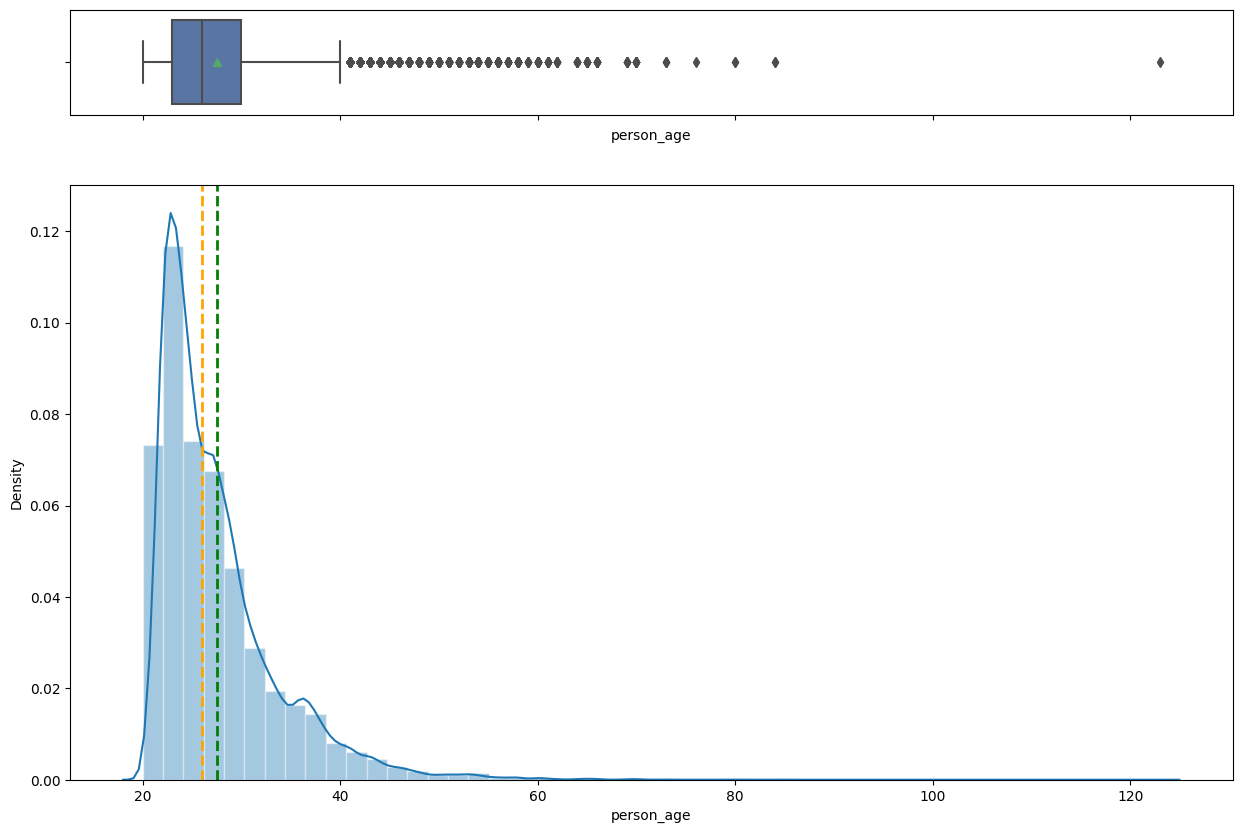

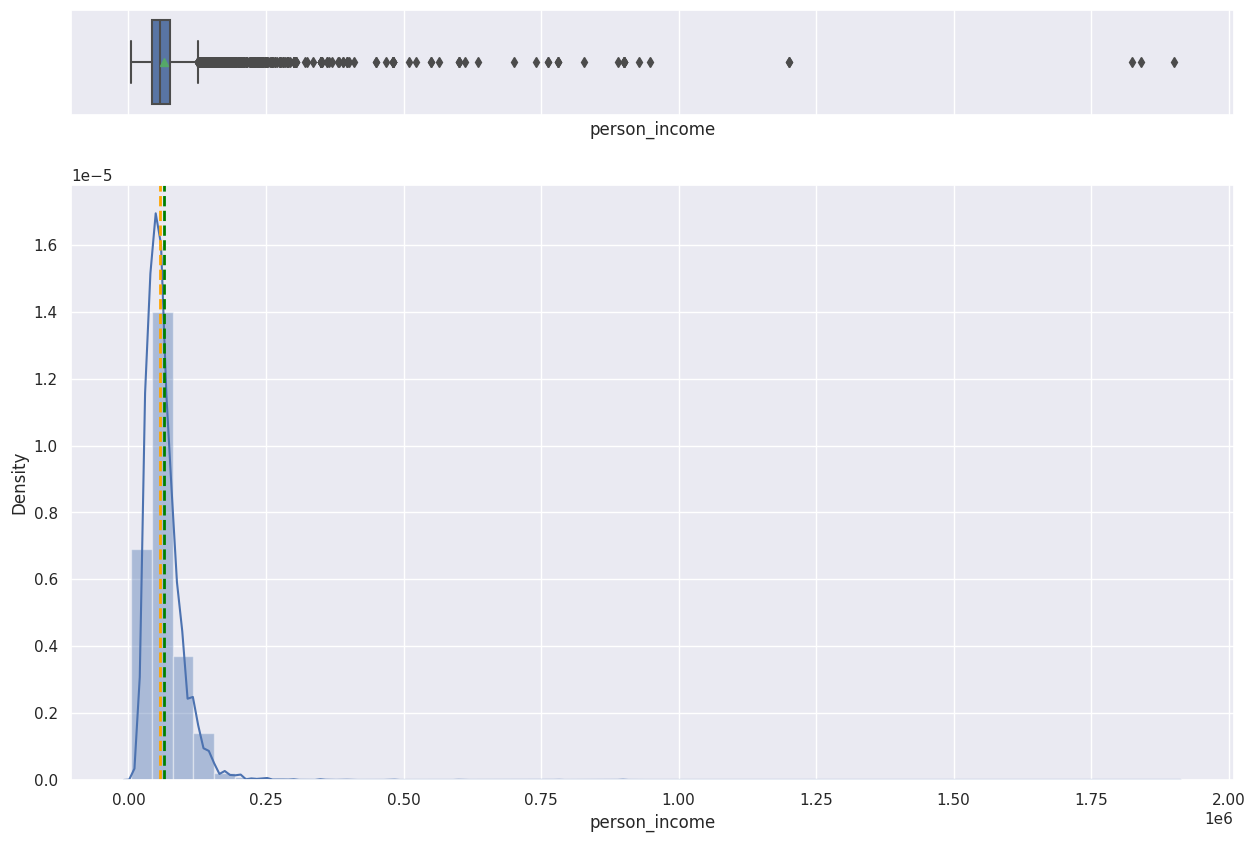

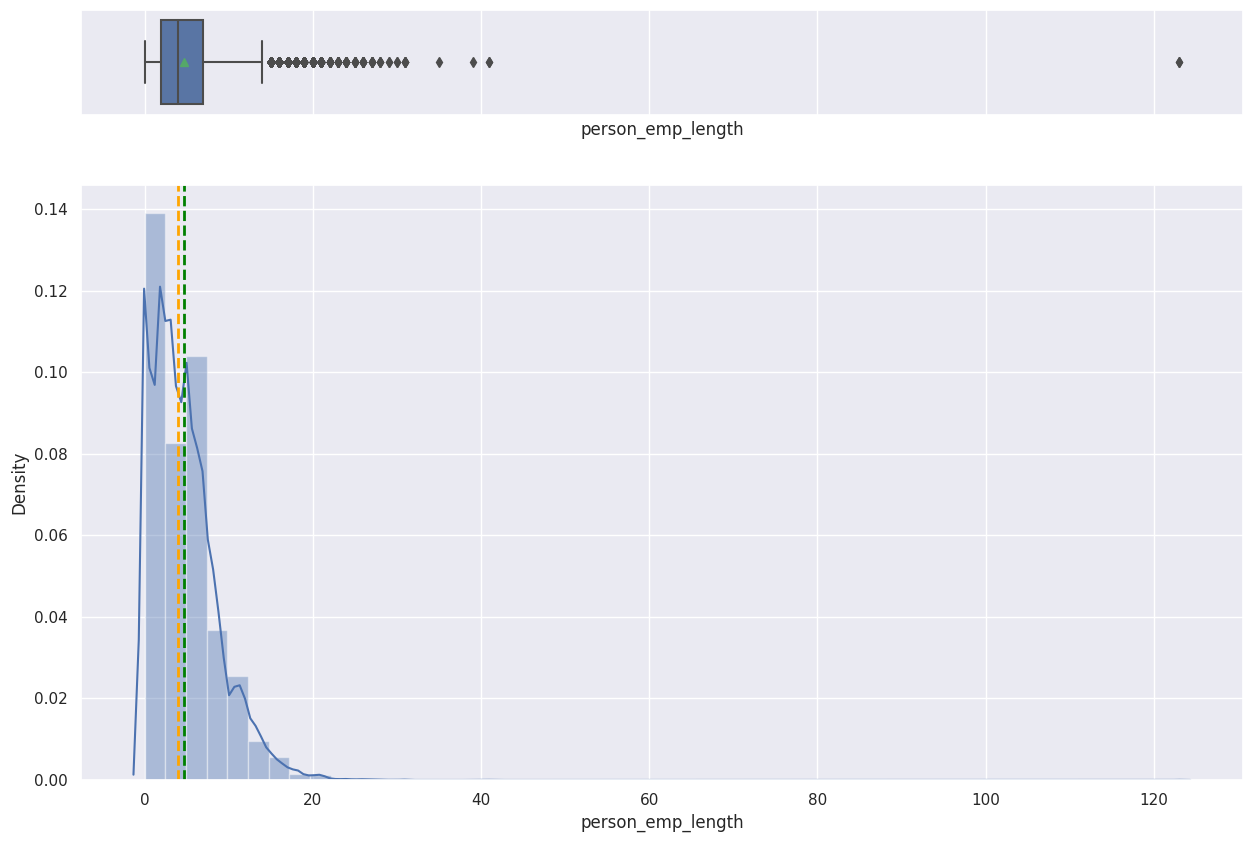

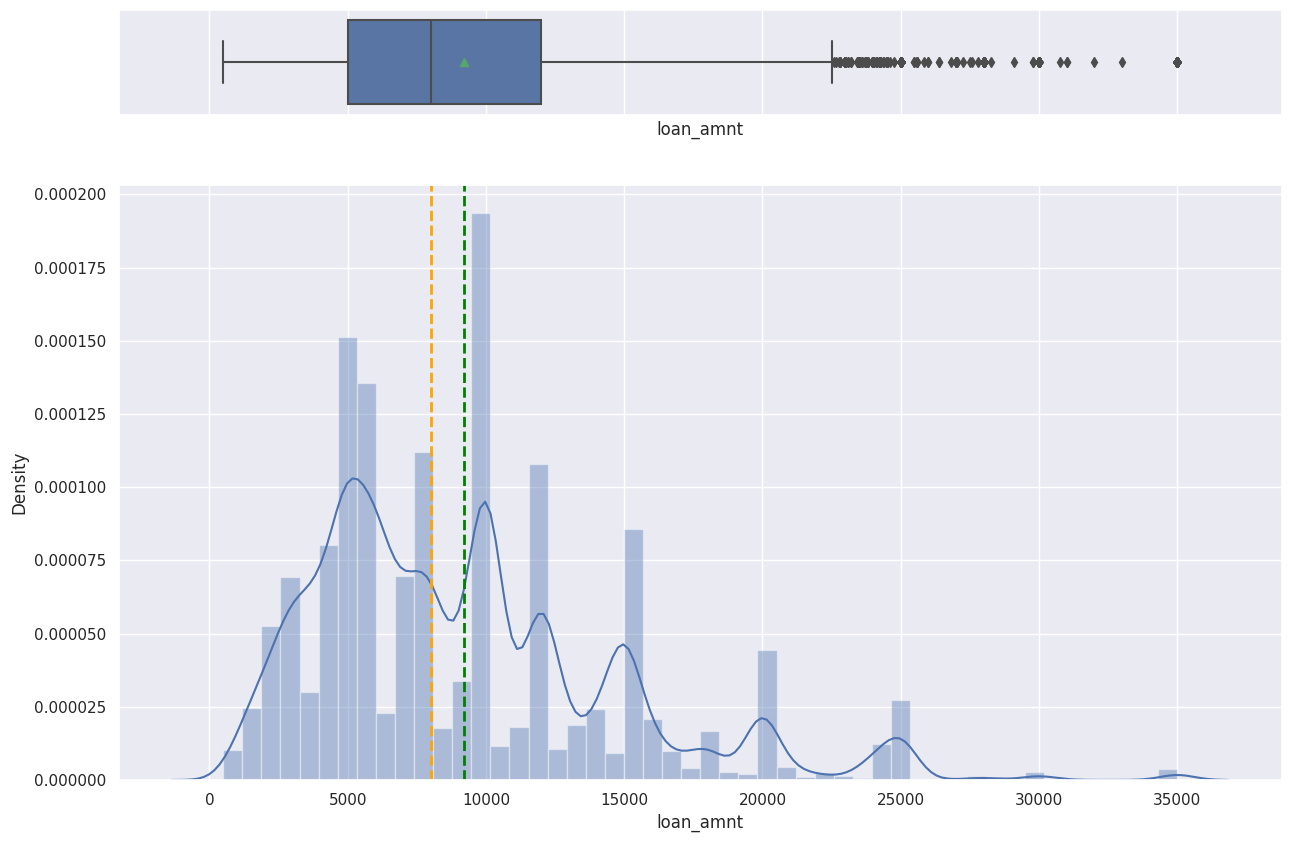

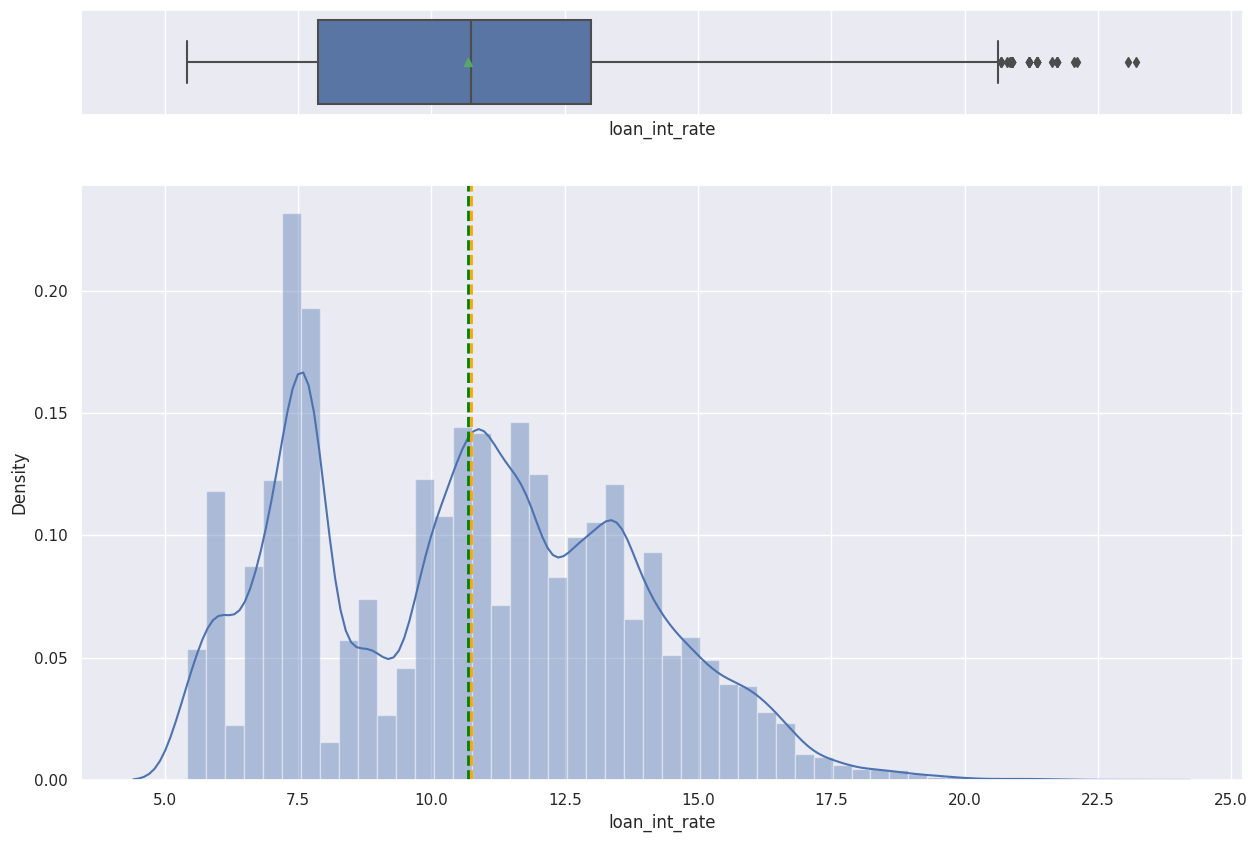

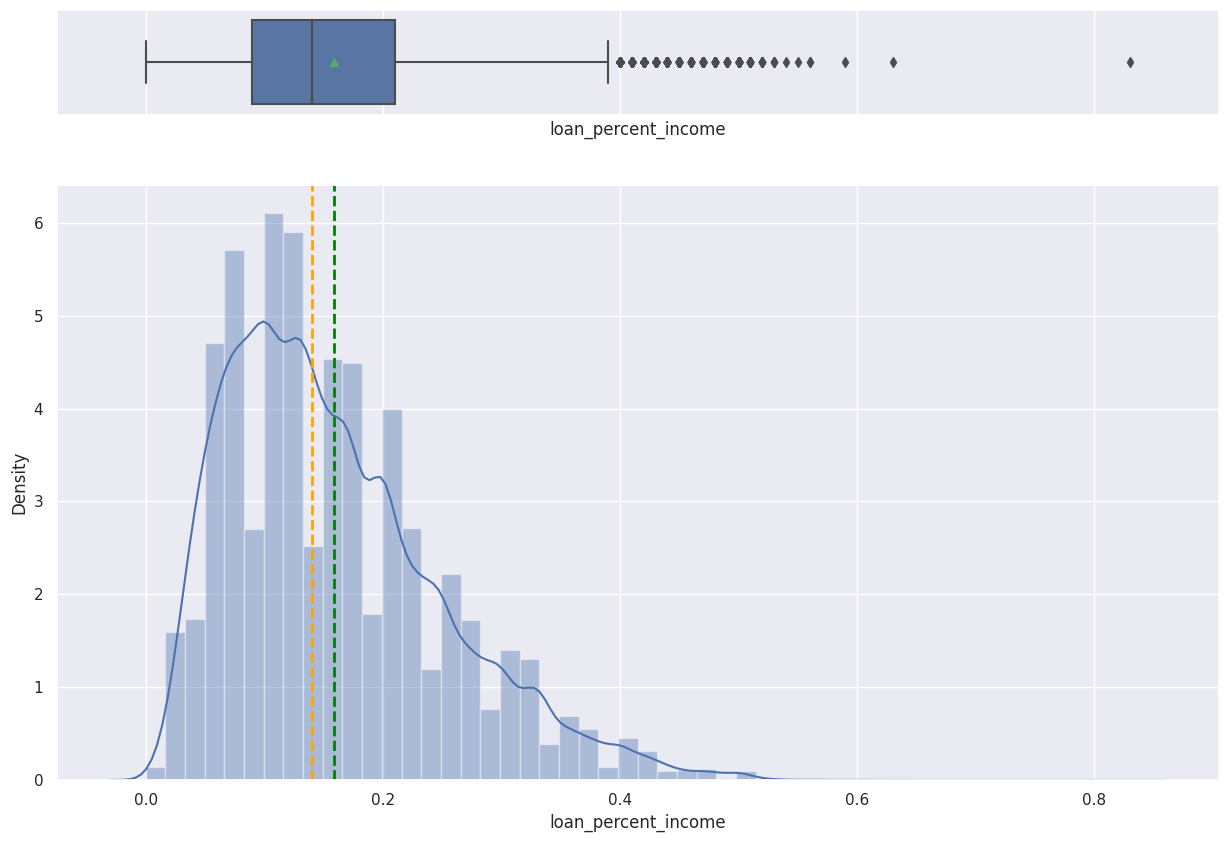

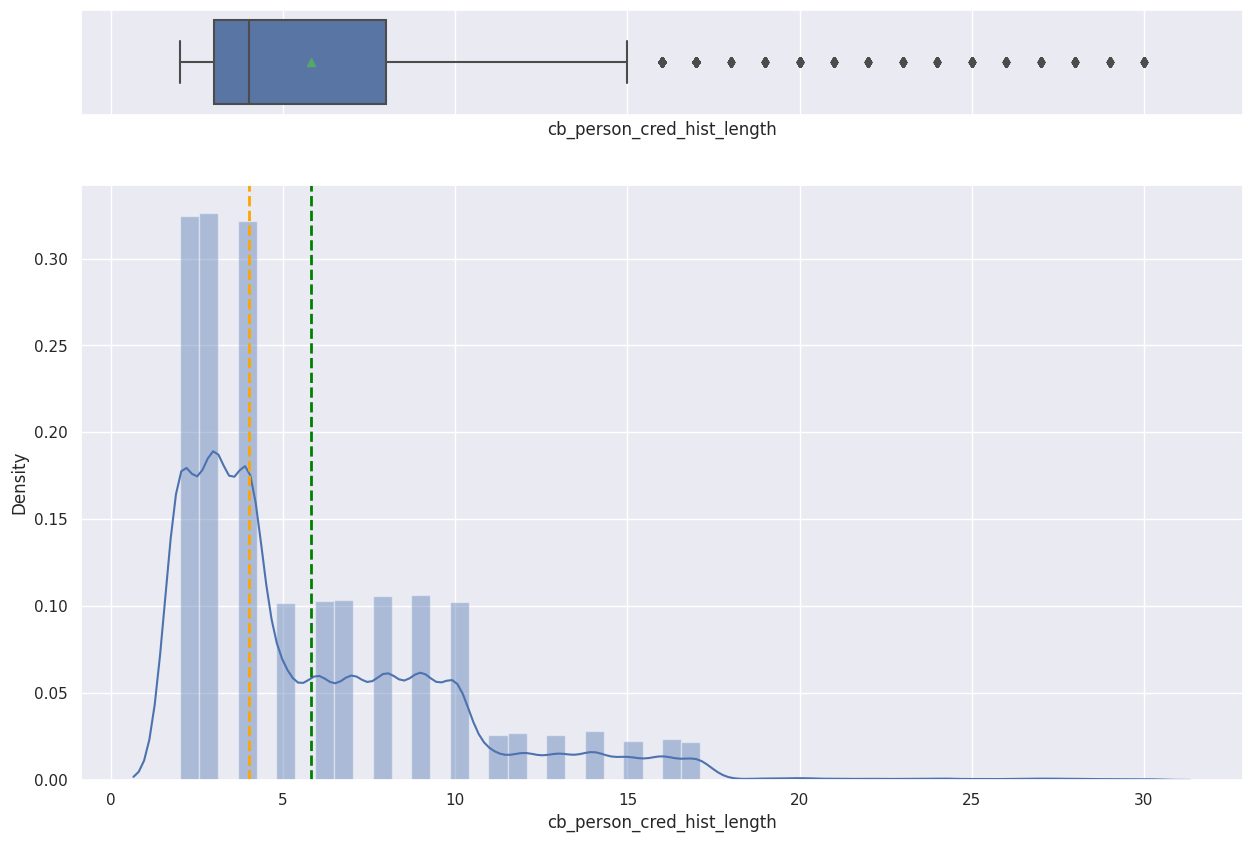

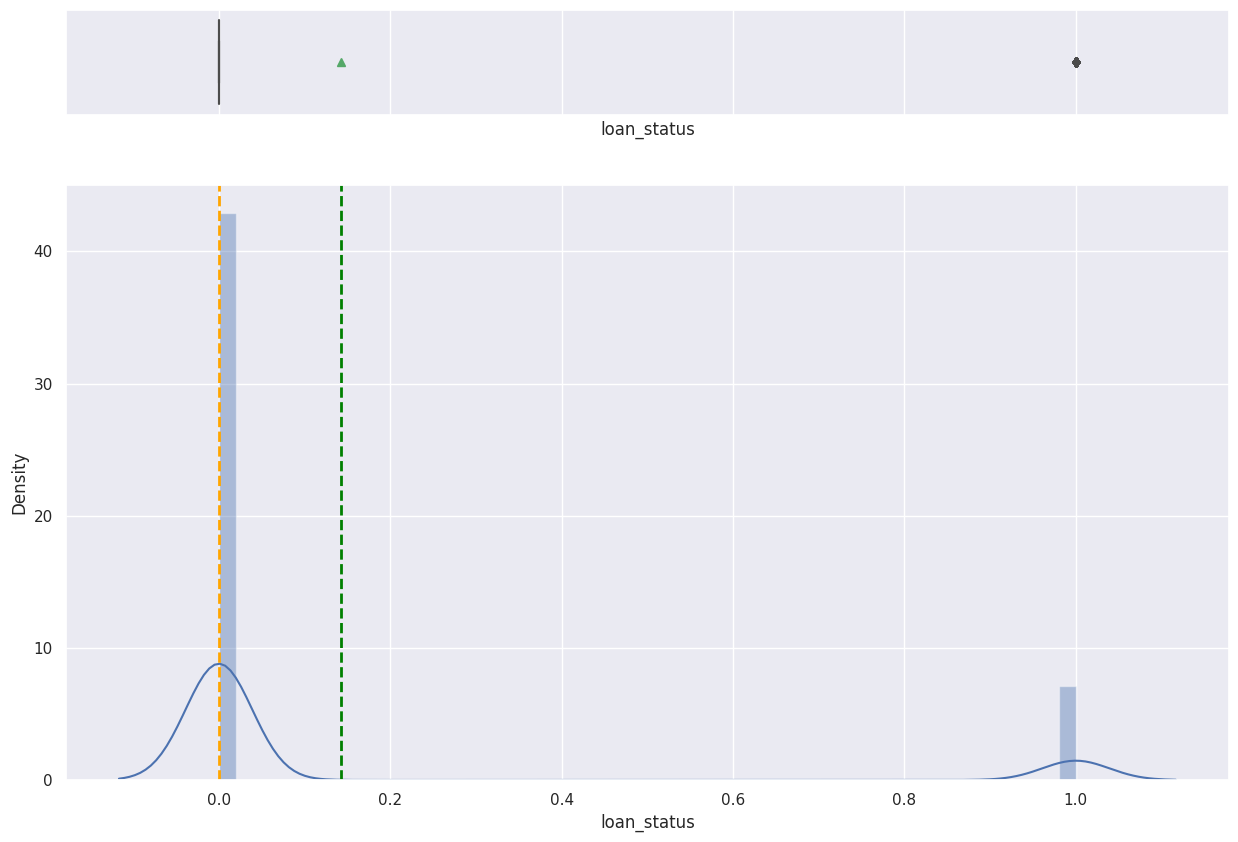

In [15]:
for i in numerical_cols:
    plotHistNBoxPlot(i)

In [16]:
def plotCountPlot(col):
    plt.figure(figsize=(15,8))
    sns.countplot(x=data_df[col],hue=data_df['loan_status'])
    plt.show()

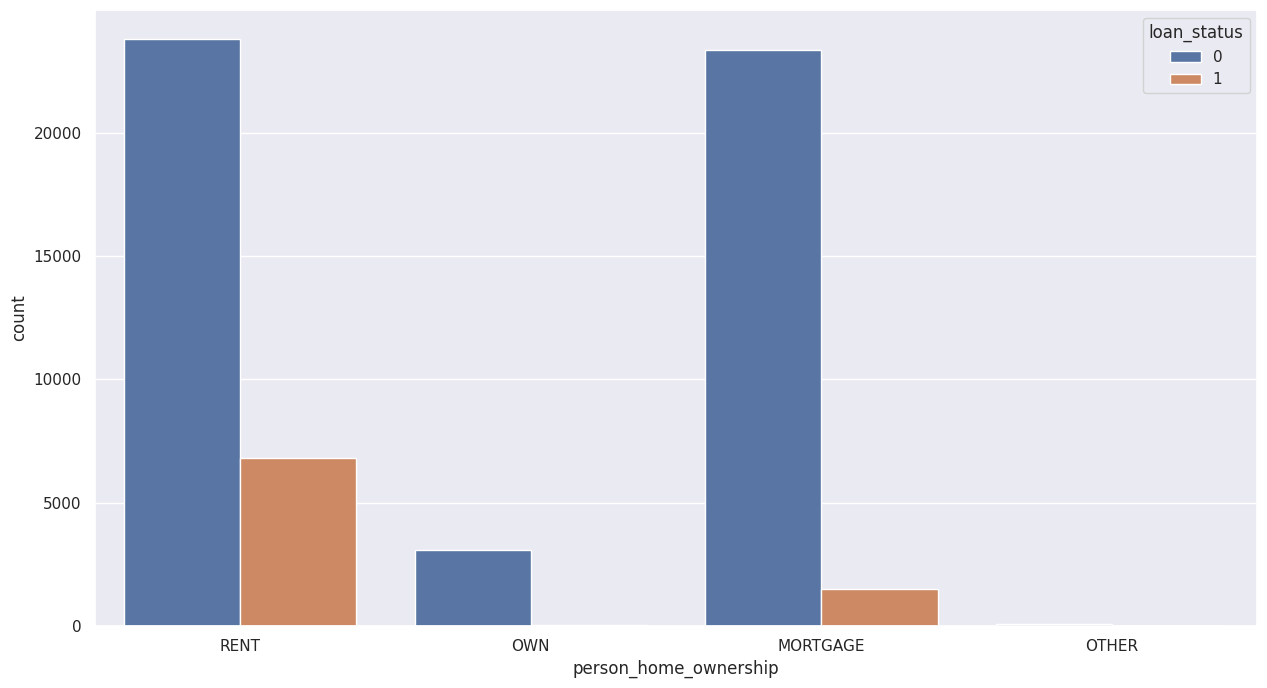

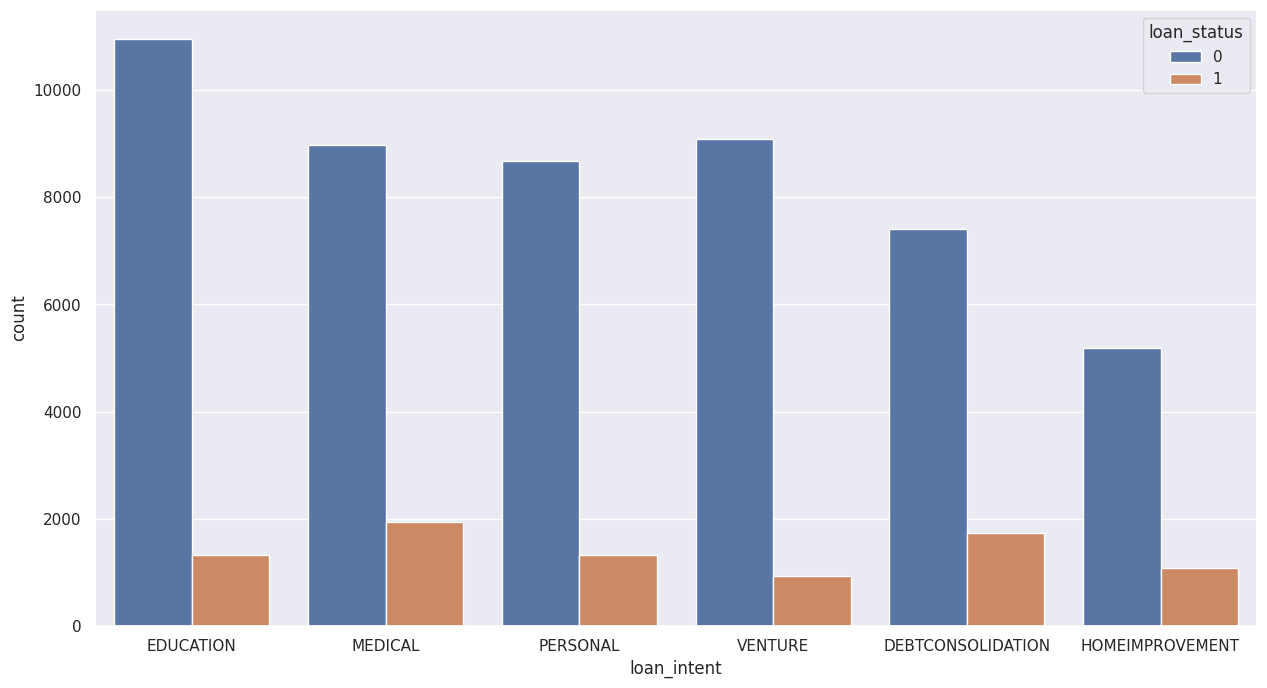

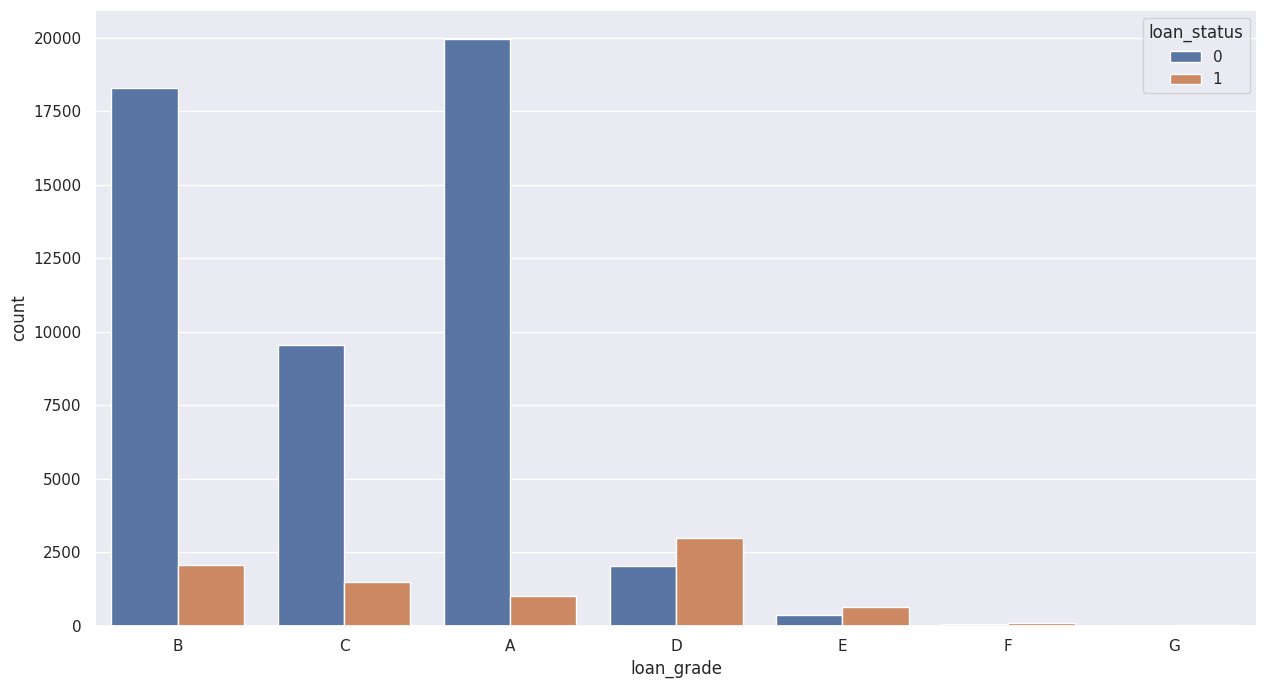

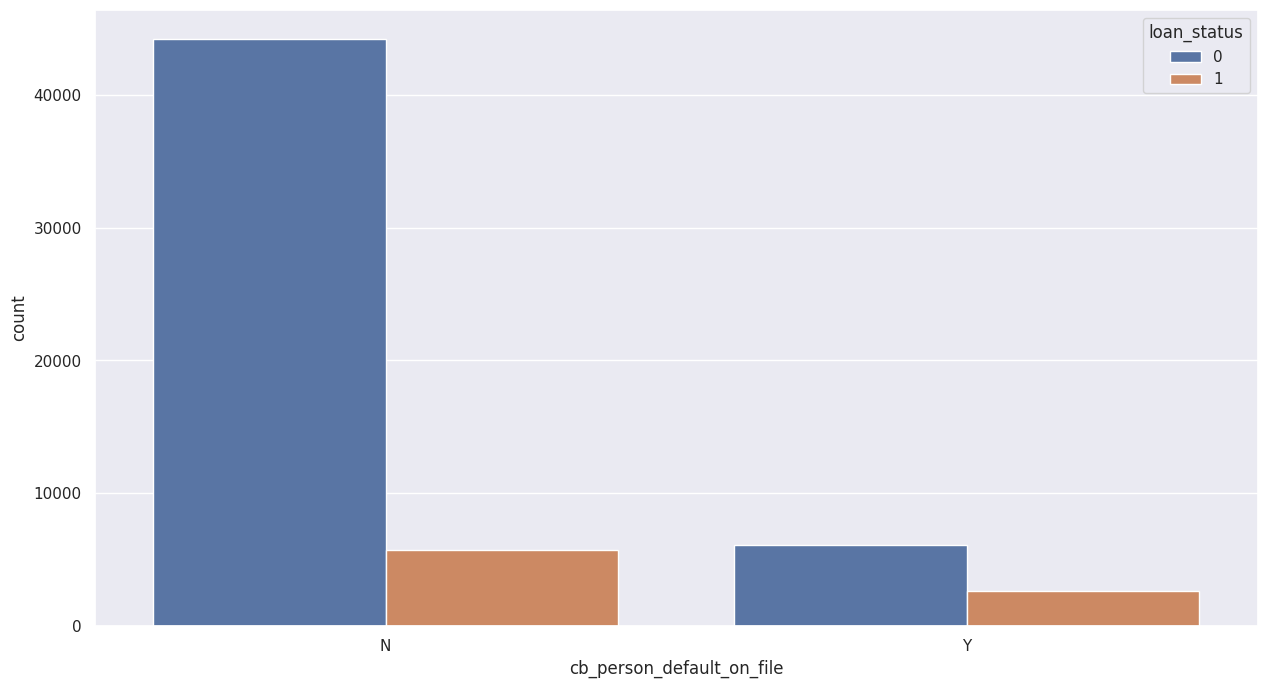

In [17]:
for i in categorical_cols:
    plotCountPlot(i)

####Analysis of categorical value
1. Loan applicants are mostly renting or have a mortgage. Loans were granted for renters and mortgage owners
2. Most loans are for education and venture. Most loans assigned are around debt consolidation followed by medical
3. Most loans are for category A. Loans in category D are likely to be awarded
4. Most loan applicants have no defaults on file. One is less likely to get a loan approved with a default on file.

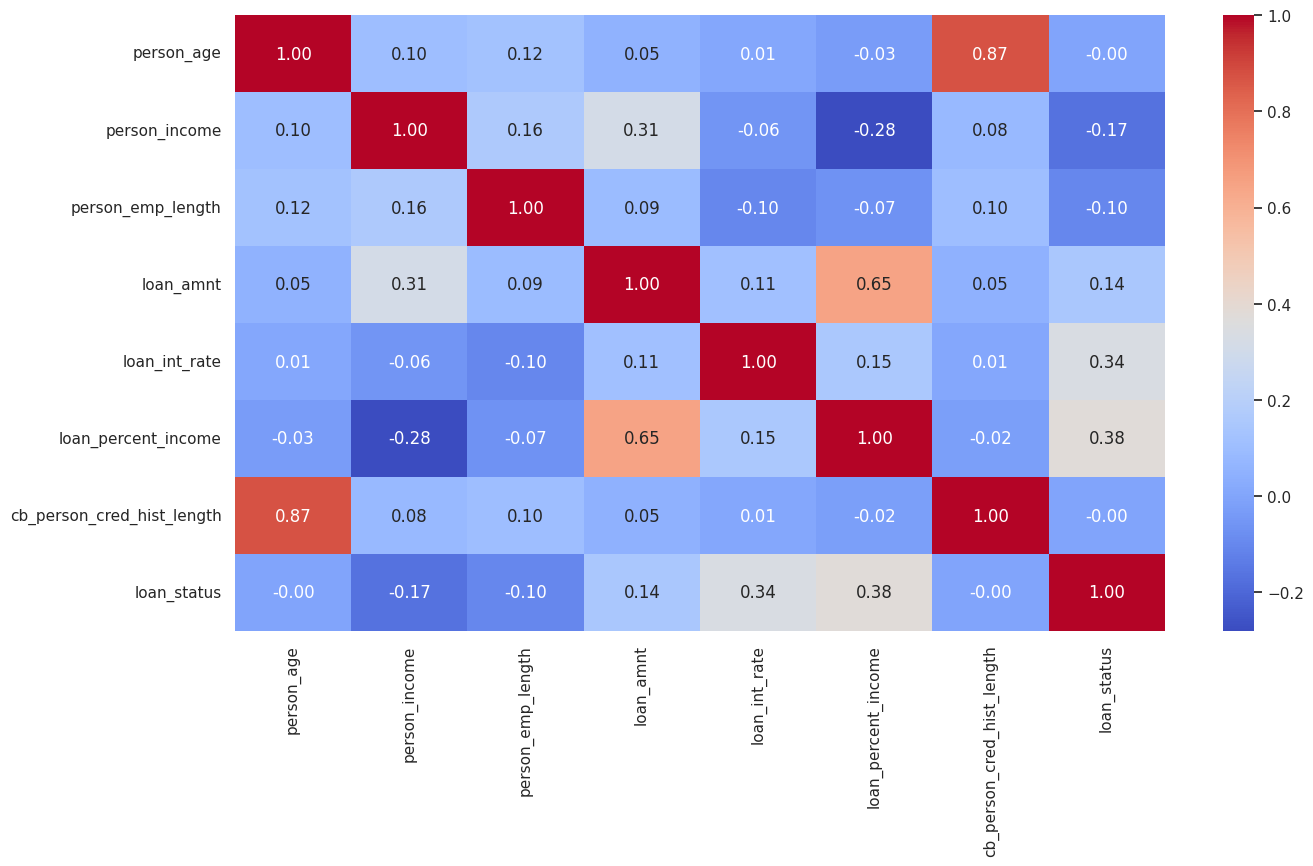

In [18]:
#Identify correlations between numerical features
plt.figure(figsize=(15,8))
sns.heatmap(data_df[numerical_cols].corr(),annot=True,cmap='coolwarm',fmt='0.2f')
plt.show()

###Observations
1. There is a strong positive correlation (0.65) between loan amount and loan percent income
2. There is a strong positive correlation (0.87) between a person's age and person credit history length
3. A person's income is negatively correlated (-0.28) with loan percent income

## **Data Preparation for Model Building**
1. Encode categorical values
2. Separate independent variables and dependent variables
3. Split data into train and resr fractions

In [19]:
data_df=pd.get_dummies(data_df,columns=categorical_cols,drop_first=True)

In [20]:
data_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,0.17,14,0,False,False,...,False,False,False,True,False,False,False,False,False,False
1,22,56000,6.0,4000,13.35,0.07,2,0,False,True,...,True,False,False,False,True,False,False,False,False,False
2,29,28800,8.0,6000,8.90,0.21,10,0,False,True,...,False,True,False,False,False,False,False,False,False,False
3,30,70000,14.0,12000,11.11,0.17,5,0,False,False,...,False,False,True,True,False,False,False,False,False,False
4,22,60000,2.0,6000,6.92,0.10,3,0,False,False,...,True,False,False,False,False,False,False,False,False,False


In [21]:
x=data_df.drop('loan_status',axis=1)

In [22]:
x.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,0.17,14,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,22,56000,6.0,4000,13.35,0.07,2,False,True,False,...,True,False,False,False,True,False,False,False,False,False
2,29,28800,8.0,6000,8.90,0.21,10,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,30,70000,14.0,12000,11.11,0.17,5,False,False,True,...,False,False,True,True,False,False,False,False,False,False
4,22,60000,2.0,6000,6.92,0.10,3,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [23]:
y=data_df['loan_status']

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score, roc_curve,auc, roc_auc_score

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
##Verify shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(46916, 22)
(11729, 22)
(46916,)
(11729,)


## **Model Building**

**The model can make 2 types of wrong predictions**
1.   Predicting that a loan applicant should not be granted a loan when they qualify
2.   Predicting that a loan be granted but the applicant defaults

**Which case is more important?**
1. In order to protect the bank, the model will minimize occurance of defaults and also to prevent losing customers by not awarding loans to qualified customers, we will optimize the F1 score.


In [27]:
#Create metric function
def metrics_score(actual, predicted):
    print(classification_report(actual,predicted))
    cm=confusion_matrix(actual,predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='0.2f', xticklabels=['Default','Not Default'],yticklabels=['Default','Not Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [35]:
def model_perfomance_classification(model, predictors, target):
    pred = model.predict(predictors)
    recall = recall_score(target, pred, average='macro')
    precision = precision_score(target, pred, average='macro')
    acc = accuracy_score(target, pred)
    f1score = f1_score(target, pred, average='macro')
    
    #Create dataframe of metrics
    df_perf = pd.DataFrame({"Precision": precision,
                           "Recall":recall,
                           "Accuracy":acc,
                           "F1_score":f1score}, index=[0])
    return df_perf

####Building the model
We will build:
1. Decision Tree
2. Random Forest

In [29]:
data_df['loan_status'].value_counts(normalize=True)

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

In [31]:
dt = DecisionTreeClassifier(class_weight={0:0.143,1:0.857}, random_state=1)#Treat both classes equally since there are more loan status = 0 values
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.143, 1: 0.857}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40216
           1       1.00      1.00      1.00      6700

    accuracy                           1.00     46916
   macro avg       1.00      1.00      1.00     46916
weighted avg       1.00      1.00      1.00     46916



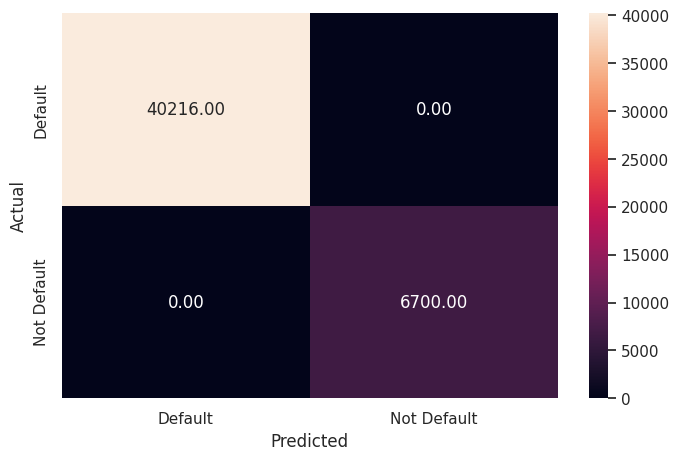

In [32]:
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)


*   The model is overfitting the training dataset

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10079
           1       0.70      0.70      0.70      1650

    accuracy                           0.92     11729
   macro avg       0.83      0.83      0.83     11729
weighted avg       0.92      0.92      0.92     11729



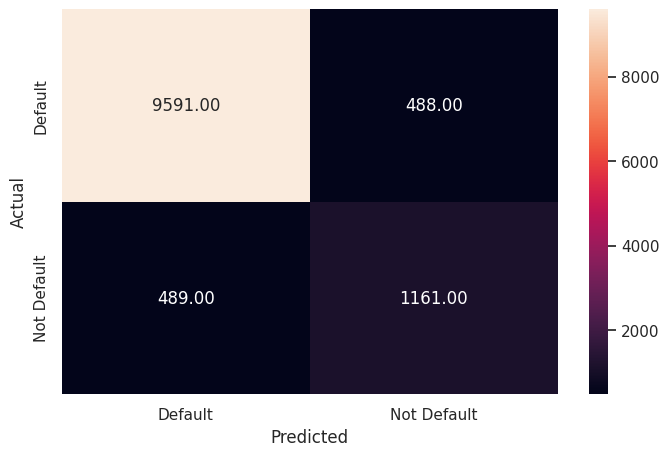

In [33]:
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

In [36]:
dtree_test=model_perfomance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy,F1_score
0,0.827776,0.827609,0.916702,0.827692


In [41]:
def plotROCCurve(target, prediction, df):
    fpr, tpr, thresholds = roc_curve(target, prediction)
    roc_auc = auc(fpr,tpr)
    df['ROC_AUC'] = roc_auc
    plt.figure(figsize=(10,8))
    plt.plot(fpr,tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],color='red',linestyle='--',lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

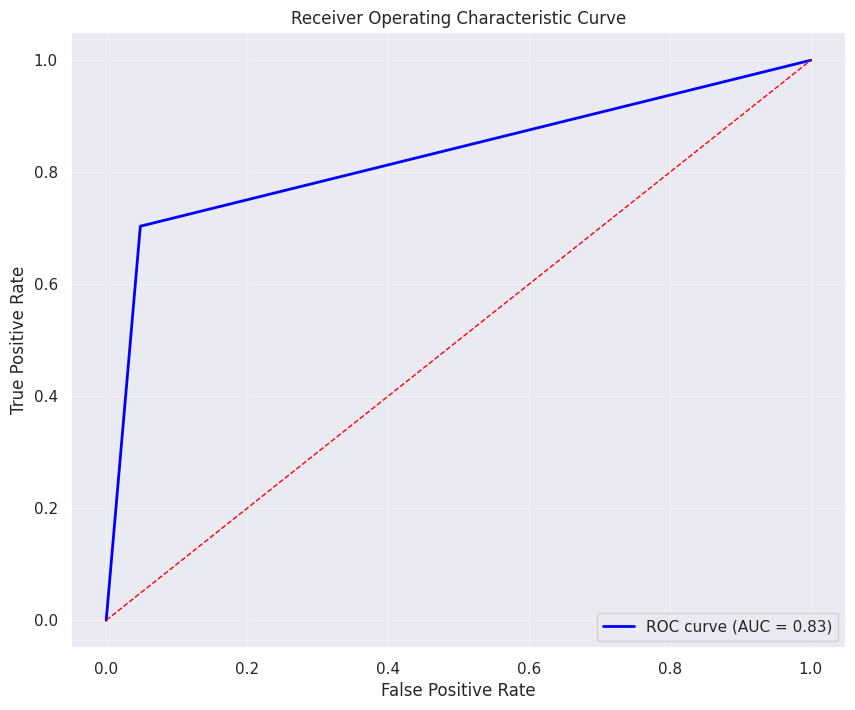

In [42]:
plotROCCurve(y_test, y_test_pred_dt, dtree_test)

In [43]:
dtree_test

,Precision,Recall,Accuracy,F1_score,ROC_AUC
0,0.827776,0.827609,0.916702,0.827692,0.827609


In [44]:
#Perform grid search for hyper parameter tuning
d_tree_estimator = DecisionTreeClassifier(class_weight={0:0.143,1:0.857}, random_state=1)#Treat both classes equally since there are more loan status = 0 values
parameters = {'max_depth':np.arange(2,7),
             'criterion':['gini','entropy'],
             'min_samples_leaf':[5,10,20,15]}

scorer = metrics.make_scorer(f1_score, pos_label=1)

gridCV = GridSearchCV(d_tree_estimator, parameters, scoring=scorer, cv=10)
gridCV = gridCV.fit(x_train,y_train)

d_tree_estimator=gridCV.best_estimator_
d_tree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.143, 1: 0.857}, max_depth=4,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     40216
           1       0.67      0.75      0.71      6700

    accuracy                           0.91     46916
   macro avg       0.81      0.85      0.83     46916
weighted avg       0.92      0.91      0.91     46916



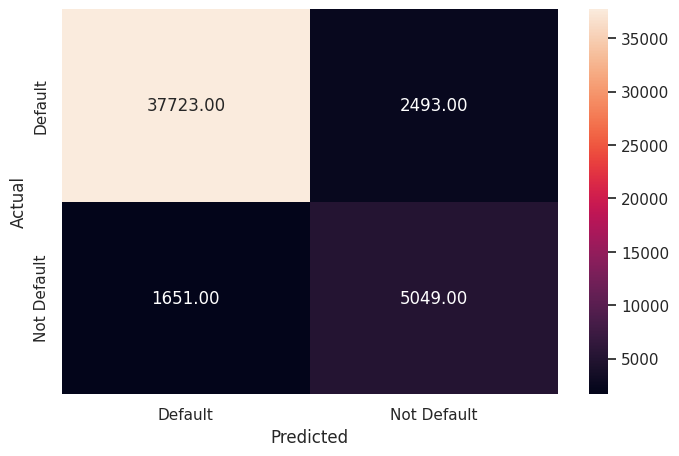

In [45]:
y_train_pred_df=d_tree_estimator.predict(x_train)
metrics_score(y_train,y_train_pred_df)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10079
           1       0.68      0.75      0.71      1650

    accuracy                           0.91     11729
   macro avg       0.82      0.85      0.83     11729
weighted avg       0.92      0.91      0.92     11729



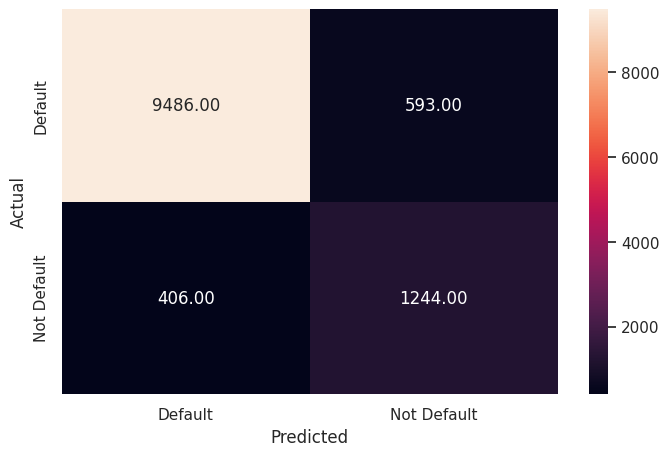

In [46]:
y_test_pred_dt = d_tree_estimator.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

In [47]:
d_tree_tuned_test = model_perfomance_classification(d_tree_estimator,x_test,y_test)
d_tree_tuned_test

,Precision,Recall,Accuracy,F1_score
0,0.818074,0.847552,0.914826,0.831742


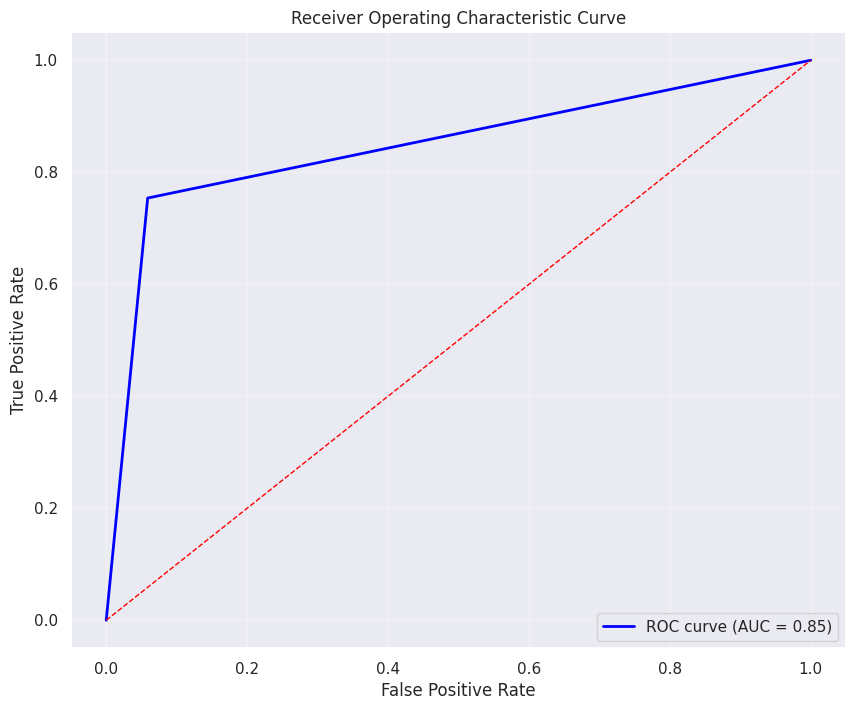

In [48]:
plotROCCurve(y_test,y_test_pred_dt,d_tree_tuned_test)

In [49]:
model_test_comp_df=pd.concat([dtree_test.T,d_tree_tuned_test.T], axis=1)
model_test_comp_df.columns = ['Decision Tree', 'Decision Tree Tuned']
print("Test Perfomance Comparison")
model_test_comp_df

Test Perfomance Comparison


,Decision Tree,Decision Tree Tuned
Precision,0.827776,0.818074
Recall,0.827609,0.847552
Accuracy,0.916702,0.914826
F1_score,0.827692,0.831742
ROC_AUC,0.827609,0.847552


In [50]:
#build a random forest classifier
rf_estimator = RandomForestClassifier(class_weight={0:0.143, 1:0.857}, random_state=1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.143, 1: 0.857}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40216
           1       1.00      1.00      1.00      6700

    accuracy                           1.00     46916
   macro avg       1.00      1.00      1.00     46916
weighted avg       1.00      1.00      1.00     46916



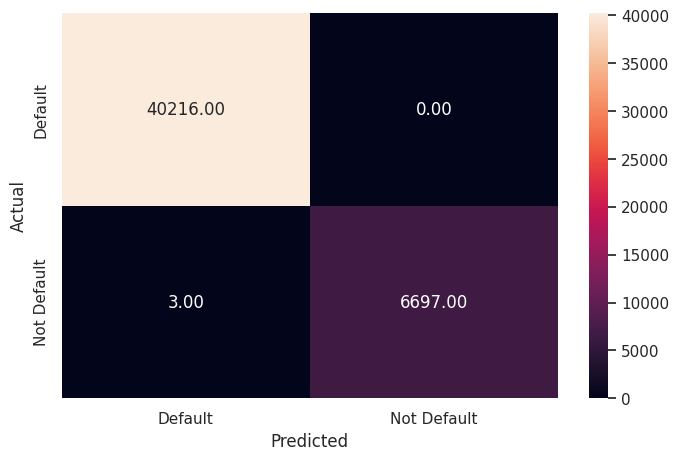

In [51]:
y_pred_train_rf=rf_estimator.predict(x_train)
metrics_score(y_train,y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10079
           1       0.93      0.70      0.80      1650

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



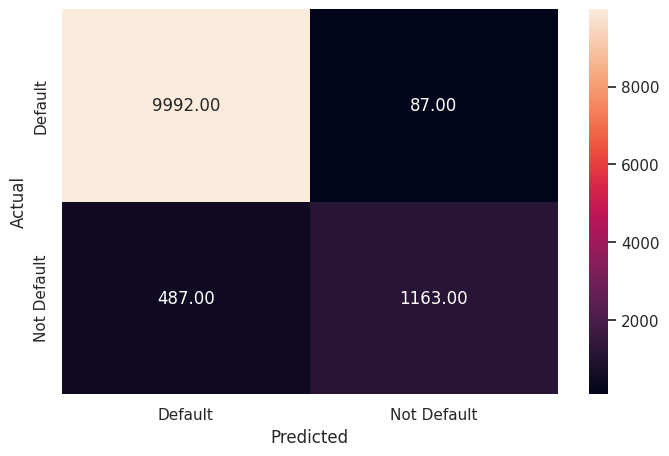

In [52]:
y_pred_test_rf=rf_estimator.predict(x_test)
metrics_score(y_test,y_pred_test_rf)

In [53]:
rf_estimator_test = model_perfomance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy,F1_score
0,0.941963,0.848108,0.951061,0.887074


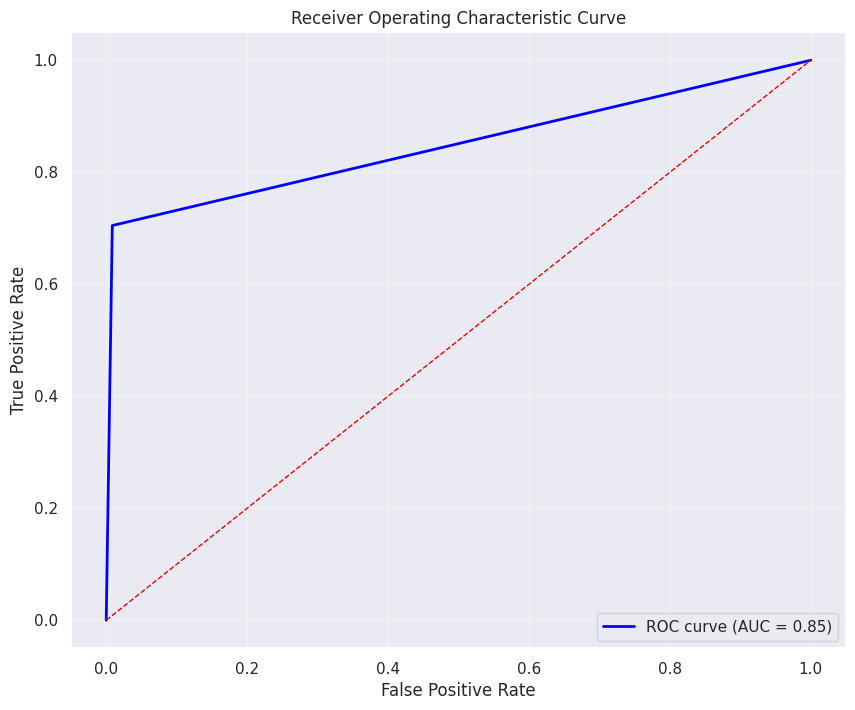

In [54]:
plotROCCurve(y_test,y_pred_test_rf,rf_estimator_test)

In [57]:
models_test_comp_df = pd.concat([dtree_test.T, d_tree_tuned_test.T,rf_estimator_test.T], axis=1)
models_test_comp_df.columns = ['Decision Tree', 'Decision Tree Tuned','Random Forest']
print("Test perfomance comparison")
models_test_comp_df

Test perfomance comparison


,Decision Tree,Decision Tree Tuned,Random Forest
Precision,0.827776,0.818074,0.941963
Recall,0.827609,0.847552,0.848108
Accuracy,0.916702,0.914826,0.951061
F1_score,0.827692,0.831742,0.887074
ROC_AUC,0.827609,0.847552,0.848108


In [59]:
#Tuning the Random Forest Classifier
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.143, 1:0.857}, random_state=1)

params_rf={'n_estimators':np.arange(10,100,20),
          'min_samples_leaf':np.arange(1,4,1),
          'max_features':[0,7,0.9,'auto']}

scorer = metrics.make_scorer(f1_score, pos_label=1)

#run grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     40216
           1       0.96      0.99      0.98      6700

    accuracy                           0.99     46916
   macro avg       0.98      0.99      0.99     46916
weighted avg       0.99      0.99      0.99     46916



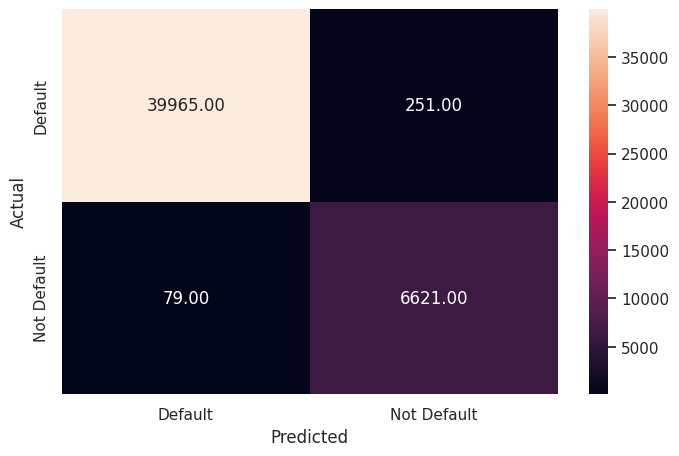

In [60]:
y_pred_train_rf_tuned=rf_estimator_tuned.predict(x_train)
metrics_score(y_train,y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10079
           1       0.91      0.73      0.81      1650

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



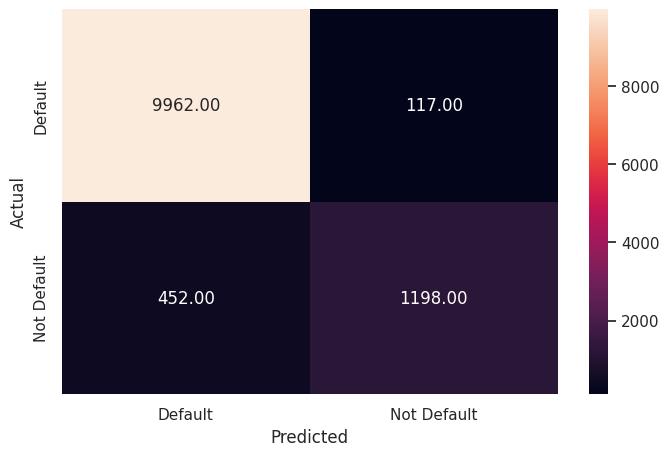

In [61]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [62]:
rf_estimator_tuned_test = model_perfomance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy,F1_score
0,0.933812,0.857226,0.951488,0.890164


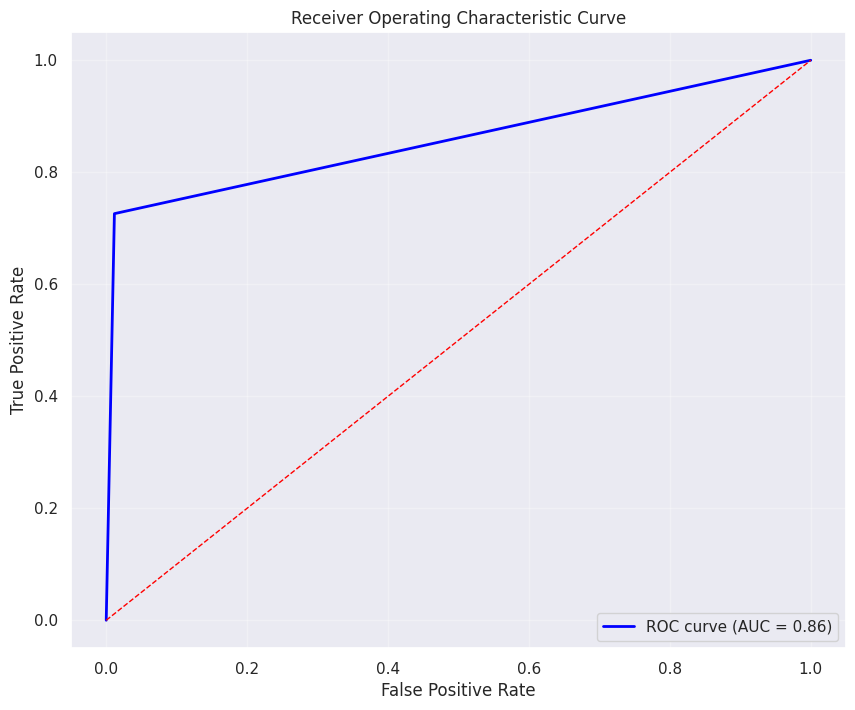

In [64]:
plotROCCurve(y_test,y_pred_test_rf_tuned,rf_estimator_tuned_test)

In [65]:
models_test_comp_df = pd.concat([dtree_test.T, d_tree_tuned_test.T,rf_estimator_test.T, rf_estimator_tuned_test.T], axis=1)
models_test_comp_df.columns = ['Decision Tree', 'Decision Tree Tuned','Random Forest','Random Forest Tuned']
print("Test perfomance comparison")
models_test_comp_df

Test perfomance comparison


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned
Precision,0.827776,0.818074,0.941963,0.933812
Recall,0.827609,0.847552,0.848108,0.857226
Accuracy,0.916702,0.914826,0.951061,0.951488
F1_score,0.827692,0.831742,0.887074,0.890164
ROC_AUC,0.827609,0.847552,0.848108,0.857226


Boosting Models

In [66]:
!pip install xgboost

In [67]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
adaboost_model = AdaBoostClassifier(random_state=1)
adaboost_model.fit(x_train,y_train)
adaboost_model_perf_test = model_perfomance_classification(adaboost_model,x_test,y_test)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10079
           1       0.81      0.63      0.71      1650

    accuracy                           0.93     11729
   macro avg       0.88      0.80      0.83     11729
weighted avg       0.92      0.93      0.92     11729



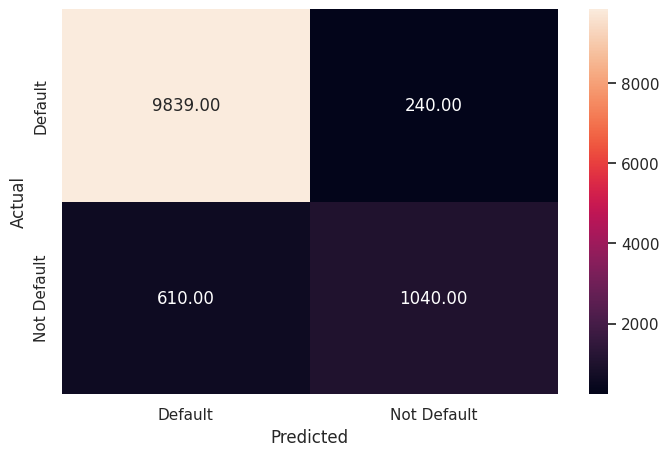

In [69]:
adaboost_test_pred = adaboost_model.predict(x_test)
metrics_score(y_test,adaboost_test_pred)

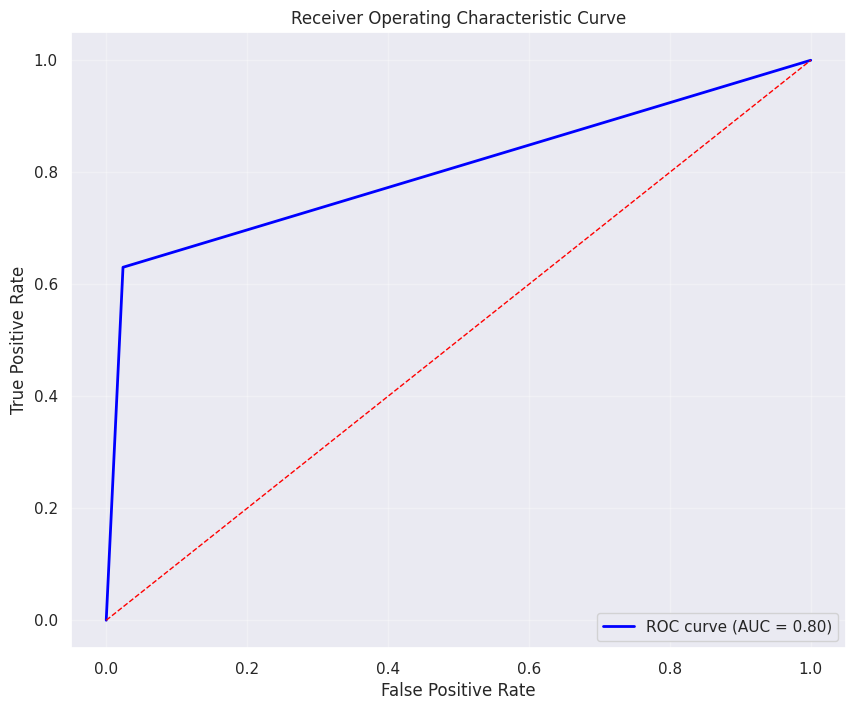

In [70]:
plotROCCurve(y_test,adaboost_test_pred,adaboost_model_perf_test)

In [71]:
models_test_comp_df = pd.concat([dtree_test.T, d_tree_tuned_test.T,rf_estimator_test.T, rf_estimator_tuned_test.T
                                 ,adaboost_model_perf_test.T], axis=1)
models_test_comp_df.columns = ['Decision Tree', 'Decision Tree Tuned','Random Forest','Random Forest Tuned','Adaboost']
print("Test perfomance comparison")
models_test_comp_df

Test perfomance comparison


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost
Precision,0.827776,0.818074,0.941963,0.933812,0.877061
Recall,0.827609,0.847552,0.848108,0.857226,0.803246
Accuracy,0.916702,0.914826,0.951061,0.951488,0.927530
F1_score,0.827692,0.831742,0.887074,0.890164,0.834245
ROC_AUC,0.827609,0.847552,0.848108,0.857226,0.803246


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10079
           1       0.90      0.69      0.78      1650

    accuracy                           0.95     11729
   macro avg       0.93      0.84      0.88     11729
weighted avg       0.94      0.95      0.94     11729



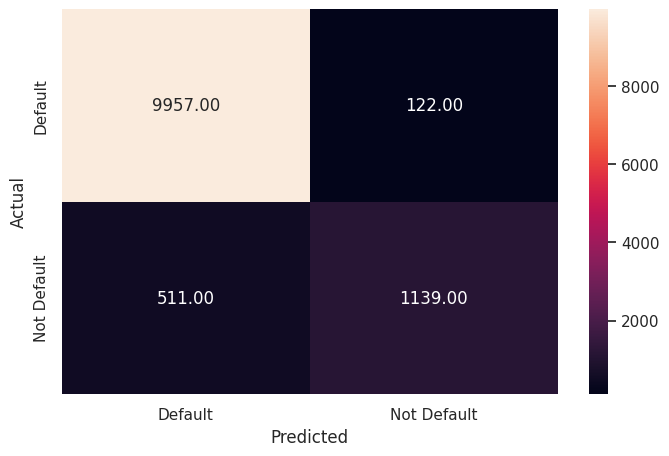

In [73]:
#gradient boost algorithm
gbc=GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)
y_pred_gbc=gbc.predict(x_test)
metrics_score(y_test,y_pred_gbc)

In [74]:
gbc_perf_test = model_perfomance_classification(gbc,x_test,y_test)

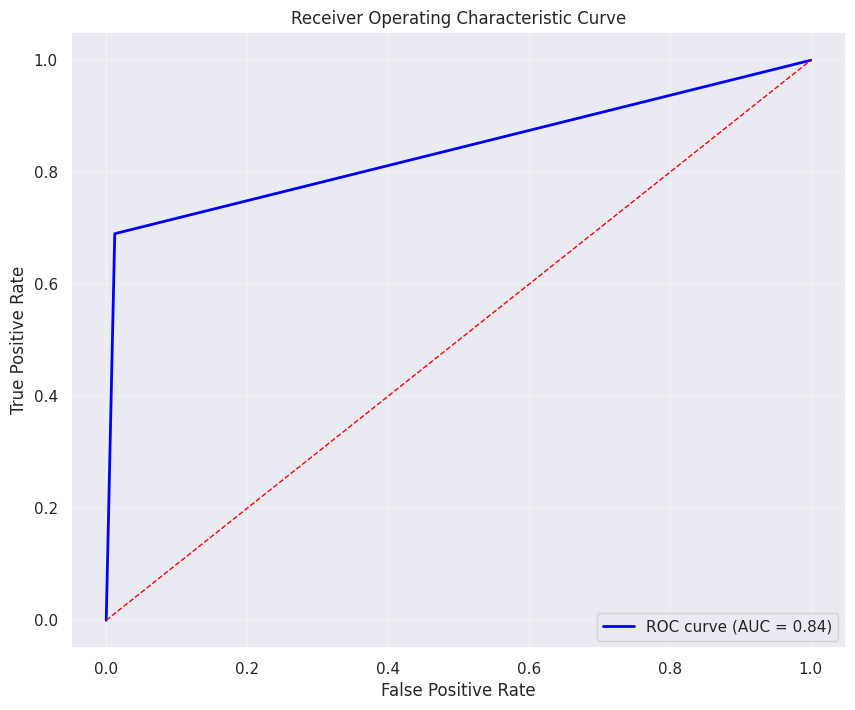

In [75]:
plotROCCurve(y_test,y_pred_gbc,gbc_perf_test)

In [76]:
models_test_comp_df = pd.concat([dtree_test.T, d_tree_tuned_test.T,rf_estimator_test.T, rf_estimator_tuned_test.T
                                 ,adaboost_model_perf_test.T,gbc_perf_test.T], axis=1)
models_test_comp_df.columns = ['Decision Tree', 'Decision Tree Tuned','Random Forest','Random Forest Tuned','Adaboost',
                               'Gradient Boost']
print("Test perfomance comparison")
models_test_comp_df

Test perfomance comparison


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost,Gradient Boost
Precision,0.827776,0.818074,0.941963,0.933812,0.877061,0.927218
Recall,0.827609,0.847552,0.848108,0.857226,0.803246,0.839099
Accuracy,0.916702,0.914826,0.951061,0.951488,0.927530,0.946031
F1_score,0.827692,0.831742,0.887074,0.890164,0.834245,0.875871
ROC_AUC,0.827609,0.847552,0.848108,0.857226,0.803246,0.839099


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10079
           1       0.91      0.74      0.82      1650

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



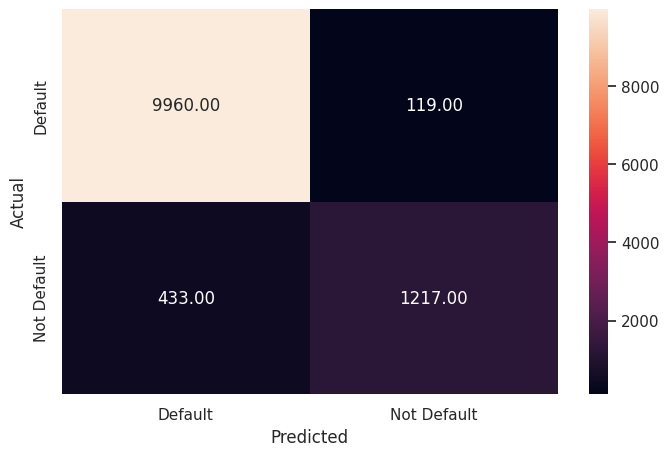

In [77]:
#XG Boost
xgb=XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
metrics_score(y_test,y_pred_xgb)

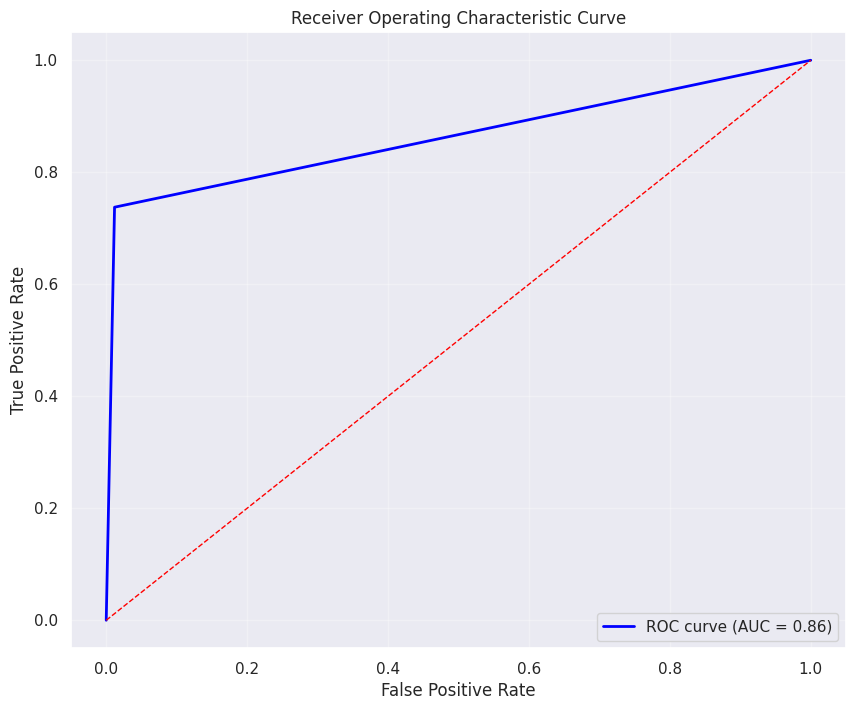

In [78]:
xgb_perf_test = model_perfomance_classification(xgb,x_test,y_test)
plotROCCurve(y_test,y_pred_xgb,xgb_perf_test)

In [79]:
models_test_comp_df = pd.concat([dtree_test.T, d_tree_tuned_test.T,rf_estimator_test.T, rf_estimator_tuned_test.T
                                 ,adaboost_model_perf_test.T,gbc_perf_test.T,xgb_perf_test.T], axis=1)
models_test_comp_df.columns = ['Decision Tree', 'Decision Tree Tuned','Random Forest','Random Forest Tuned','Adaboost',
                               'Gradient Boost','XG Boost']
print("Test perfomance comparison")
models_test_comp_df

Test perfomance comparison


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost,Gradient Boost,XG Boost
Precision,0.827776,0.818074,0.941963,0.933812,0.877061,0.927218,0.934633
Recall,0.827609,0.847552,0.848108,0.857226,0.803246,0.839099,0.862885
Accuracy,0.916702,0.914826,0.951061,0.951488,0.927530,0.946031,0.952937
F1_score,0.827692,0.831742,0.887074,0.890164,0.834245,0.875871,0.894087
ROC_AUC,0.827609,0.847552,0.848108,0.857226,0.803246,0.839099,0.862885


In [81]:
test_data_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
test_data_df.shape

(39098, 12)

In [83]:
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [84]:
competition_train_df = test_data_df.drop('id',axis=1)

In [85]:
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [86]:
competition_train_df=pd.get_dummies(competition_train_df,columns=categorical_cols,drop_first=True)

In [87]:
competition_train_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,23,69000,3.0,25000,15.76,0.36,2,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,26,96000,6.0,10000,12.68,0.10,4,False,False,False,...,False,True,False,False,True,False,False,False,False,True
2,26,30000,5.0,4000,17.19,0.13,2,False,False,True,...,False,False,True,False,False,False,True,False,False,True
3,33,50000,4.0,7000,8.90,0.14,7,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,26,102000,8.0,15000,16.32,0.15,4,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [88]:
competition_loan_prediction=xgb.predict(competition_train_df)

In [89]:
competition_loan_prediction

array([1, 0, 1, ..., 0, 0, 1])

In [91]:
competition_submission=pd.DataFrame({'id':test_data_df['id'],'loan_status':competition_loan_prediction})